# Heart Attack EDA and Prediction


This notebook aims at exploring the dataset and making predictions on whether a person will have heart attack or not.

# Table of Contents


* <a href='#di'> Dataset Info </a>
* <a href='#pw'> Preparing Workspace </a>
	- <a href='#il'> Importing Libraries </a>
	- <a href='#sp'> Setting Params </a>
	- <a href='#ld'> Loading Data </a>
* <a href='#pa'> Preliminary Analysis </a>
	- <a href='#sotd'> Shape of the dataset </a>
	- <a href='#pwotd'> Preview of the dataset </a>
	- <a href='#mv'> Missing Values </a>
	- <a href='#cac'> Categorical and Continous </a>
	- <a href='#gs'> General Stats </a>
* <a href='#eda'> Exploratory Data Analysis </a>
	- <a href='#ua'> Univariate Analysis </a>
		+ <a href='#vpfcv'> Voilin plot for continous variables </a>
		+ <a href='#cpfcf'> Count plot for categorical features </a>
	- <a href='#ba'> Bivariate Analysis </a>
		+ <a href='#socvwto'> Seperation of categorical variables w.r.t to output </a>
		+ <a href='#ccvfcv'> Corrected Cramer's V for categorical variables </a>
		+ <a href='#pfcvwo'> Plots for continous variables w.r.t output <a>
		+ <a href='#kwht'> Kruskal-Wallis H-test </a>
		+ <a href='#cfmc'> Check for Multi-Collinearity: Correlation of variables among themselves </a>
		+ <a href='#pp'> Pair plot - One plot to rule them all <a>
	- <a href='#edac'> Conclusion </a>
* <a href='#md'> Model Development </a>
	- <a href='#ll'> Loading Libraries </a>
	- <a href='#fe'> Feature Engineering </a>
	- <a href='#tmagr'> Training Models and Getting Results </a>
	- <a href='#secm'> Stacking </a>
	- <a href='#pos'> Plot of Scores </a>
* <a href='#fcc'> Conclusion </a>
* <a href='#ty'> Thank you! </a>

# Dataset Info <span id='di'/>

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh` - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

# Preparing Workspace <span id='pw'/>

## Importing Libraries <span id='il'/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss

print('Libraries are imported')

Libraries are imported


## Setting Params <span id='sp'/>

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_palette('deep')
sns.set_color_codes()
sns.set_style('dark')

print('Parameters are set')

Parameters are set


## Loading Data <span id='ld'/>

In [3]:
df = pd.read_csv('heart.csv')
print('Data is Loaded')

Data is Loaded


# Preliminary Analysis <span id='pa'/>

## Shape of the dataset <span id='sotd'/>

In [4]:
print(f'Shape of the Dataset is: {df.shape}')

Shape of the Dataset is: (303, 14)


## Preview of the dataset <span id='pwotd'/>

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Missing Values <span id='mv'/>

In [6]:
df.isna().apply(pd.value_counts, axis=0)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
False,303,303,303,303,303,303,303,303,303,303,303,303,303,303


## Categorical and Continous <span id='cac'/>

In [7]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thall', 'caa', 'slp']
continous = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
print('Categorical Variables are:', ', '.join(categorical))
print('Continous Variables are:', ', '.join(continous))

Categorical Variables are: sex, cp, fbs, restecg, exng, thall, caa, slp
Continous Variables are: age, trtbps, chol, thalachh, oldpeak


## General Stats <span id='gs'/>

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis <span id='eda'/>

## Univariate Analysis <span id='ua'/>

### Voilin plot for continous variables <span id='vpfcv'/>

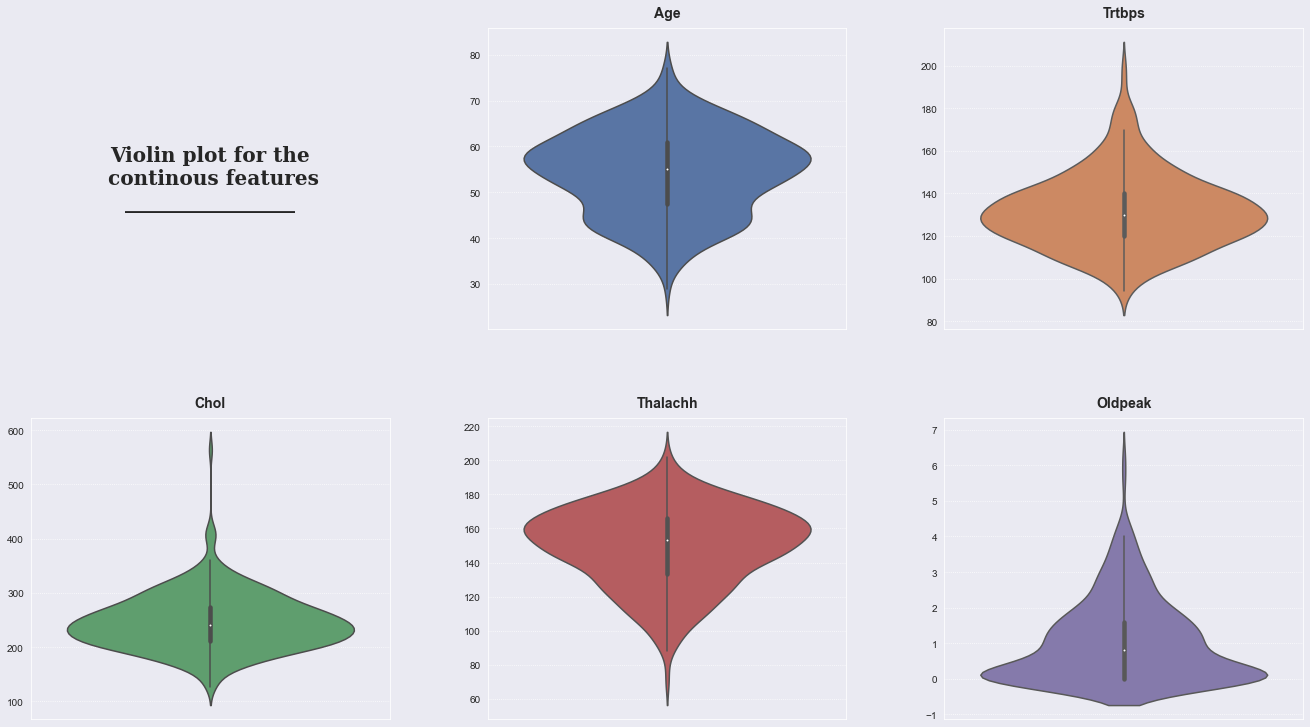

In [9]:
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Violin plot for the\n continous features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    color = sns.color_palette('deep')[i - 1]
    sns.violinplot(data=df, y=var, ax=ax, color=color)
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `chol`, `trtbps`, and `oldpeak` have *decent amount of outliers* that could affect certain models sensitive to them.

* `oldpeak` and `chol` (moderately) are *not uniformly distributed*. This could affect models or analysis with uniform distribution as requirement. 

### Count plot for categorical features <span id='cpfcf'/>

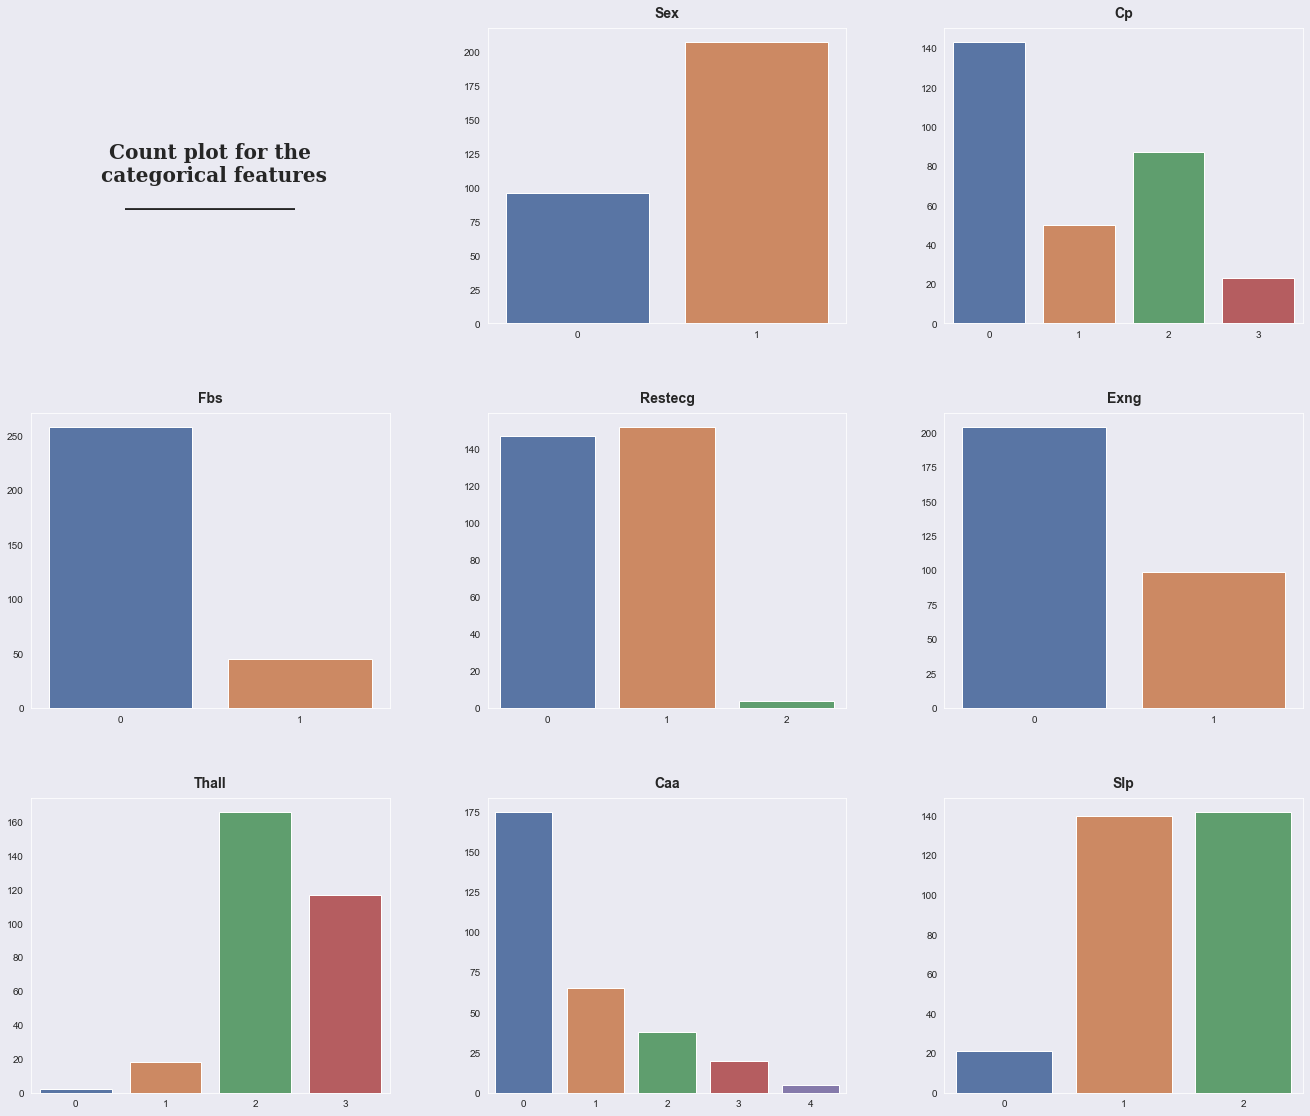

In [10]:
chart_count = len(categorical) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for the\n categorical features\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = categorical[i - 1]
    ax = axes[i]
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `Restecg`, `Thall`, `Caa`, `Slp` are *likely to impact few models sensitive to data distribution* because value counts for some values is extremely low. 

* `Fbs` and `Cp` could *possibly affect models sensitive to data distribution* because their value counts is also not ideal. 

## Bivariate Analysis <span id='ba'/>

### Seperation of categorical variables w.r.t to output <span id='socvwto'/>

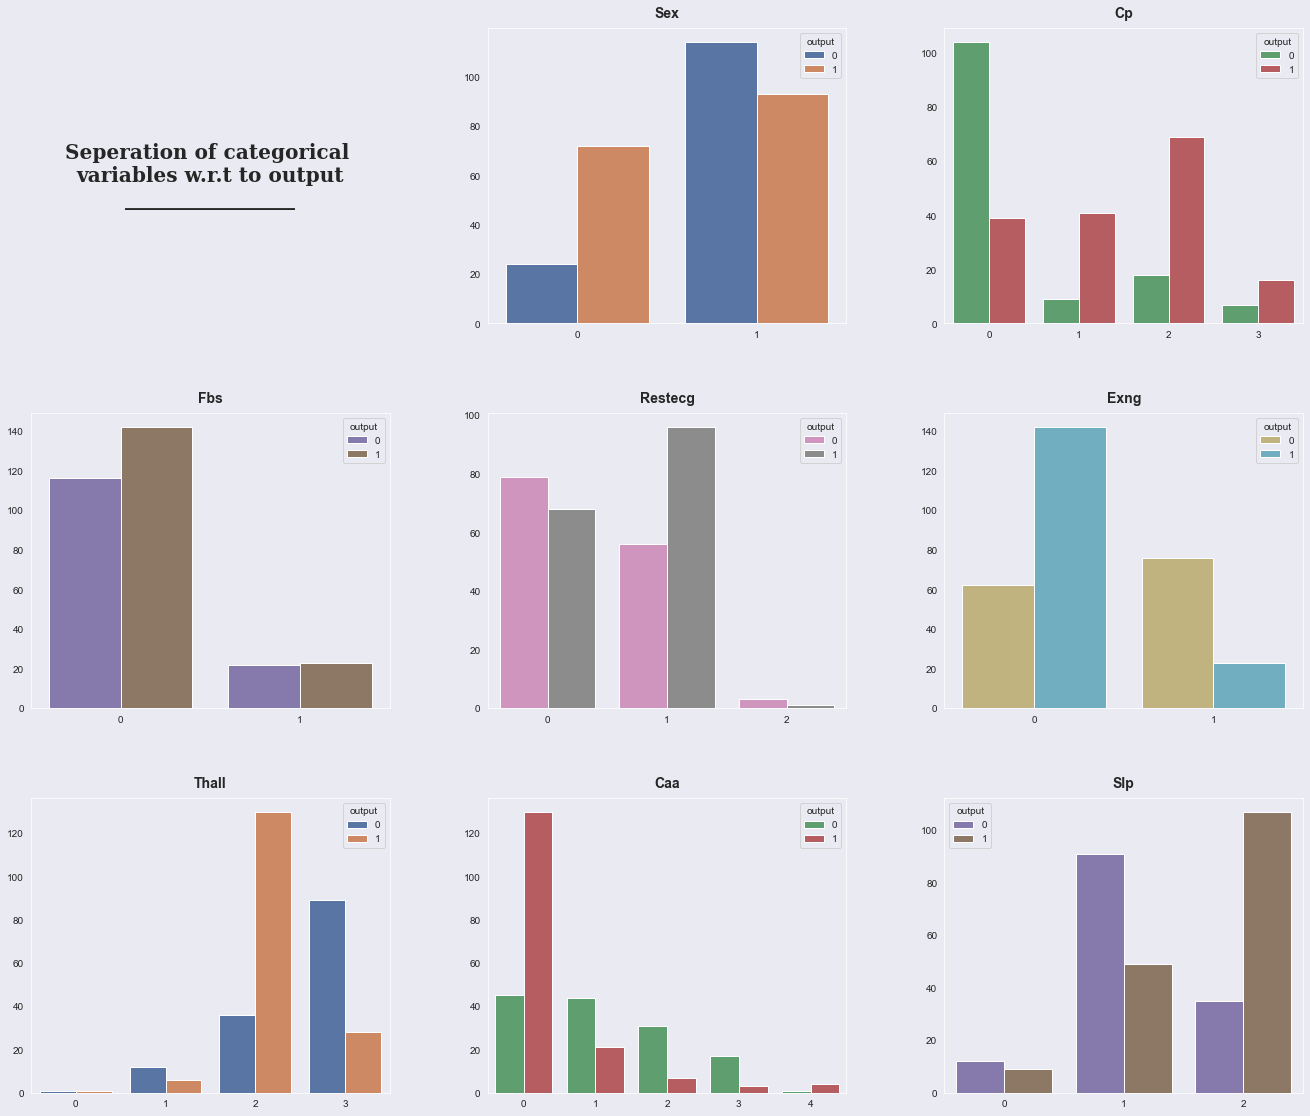

In [11]:
chart_count = len(categorical) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Seperation of categorical \nvariables w.r.t to output\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = categorical[i - 1]
    ax = axes[i]
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    colorIndex = (2*(i - 1)) % 10
    color1 = sns.color_palette('deep')[colorIndex]
    color2 = sns.color_palette('deep')[colorIndex + 1]
    sns.countplot(data=df, x=var, ax=ax, hue='output',
                  palette=[color1, color2])
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `Fbs` *doesn't seem to be related* at all to output

* `Sex`, `Restecg` seem to be *somewhat correlated* to output

* Others have a *fair correlation* w.r.t to output

### Corrected Cramer's V for categorical variables <span id='ccvfcv'/>

In [12]:
def cramers_corrected_stat(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result = -1

    conf_matrix = pd.crosstab(x, y)

    if conf_matrix.shape[0] == 2:
        correct = False
    else:
        correct = True

    chi2, p = ss.chi2_contingency(conf_matrix, correction=correct)[0:2]

    n = sum(conf_matrix.sum())
    phi2 = chi2/n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    result = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return round(result, 6), round(p, 6)


for var in categorical:
    x = df[var]
    y = df['output']
    cramersV, p = cramers_corrected_stat(x, y)
    print(f'For variable {var}, Cramer\'s V: {cramersV} and p value: {p}')

For variable sex, Cramer's V: 0.275437 and p value: 1e-06
For variable cp, Cramer's V: 0.510413 and p value: 0.0
For variable fbs, Cramer's V: 0.0 and p value: 0.625416
For variable restecg, Cramer's V: 0.162926 and p value: 0.006661
For variable exng, Cramer's V: 0.433668 and p value: 0.0
For variable thall, Cramer's V: 0.522014 and p value: 0.0
For variable caa, Cramer's V: 0.48266 and p value: 0.0
For variable slp, Cramer's V: 0.388156 and p value: 0.0


#### Conclusion

The stats seem to agree with the conclusions we drew previously from graph along with a measure of the correlation.

* `Fbs` is *not related* at all

* `Sex`, `Restecg` have *very weak correlation*

* `Sp`, `Thall` seem to have a *moderately strong correlation*

* `Exng`, `Caa`, `Slp` have *decent correlation*

### Plots for continous variables w.r.t output <span id='pfcvwo'>

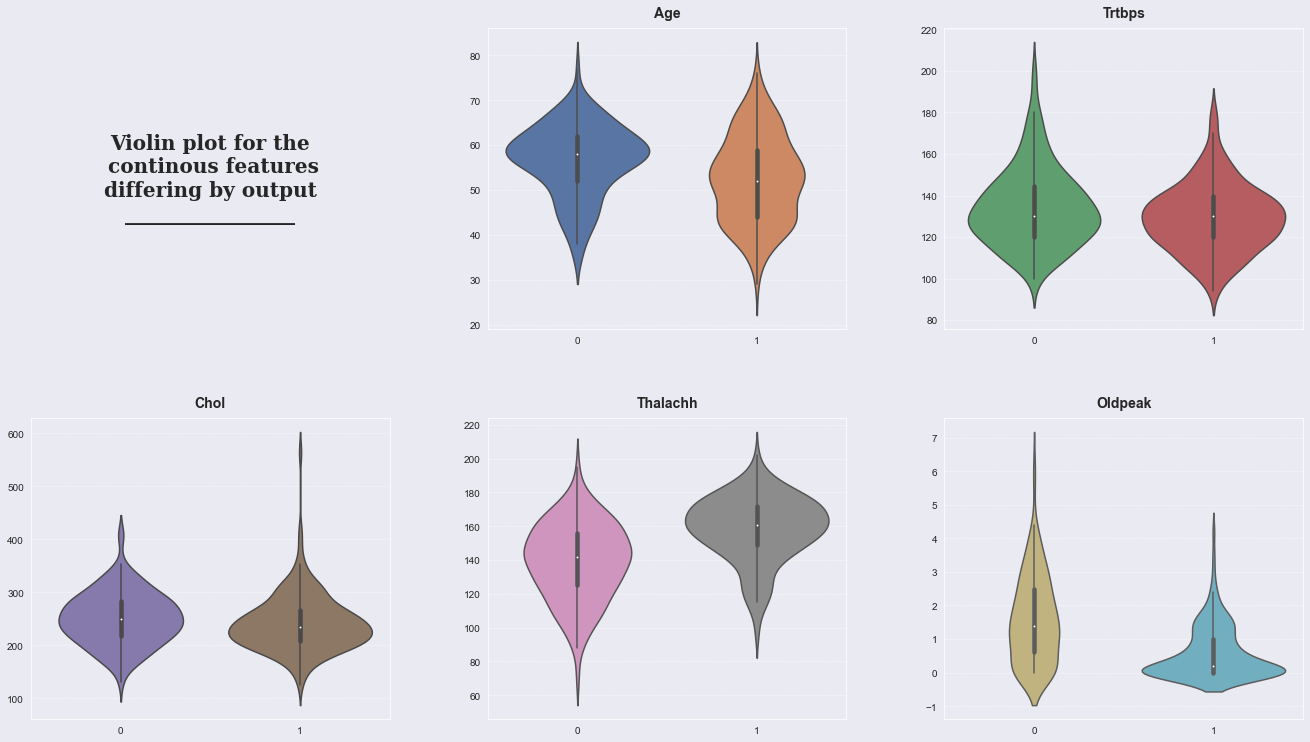

In [13]:
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 17))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Violin plot for the\n continous features\ndiffering by output\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    colorIndex = (2*(i - 1)) % 10
    color1 = sns.color_palette('deep')[colorIndex]
    color2 = sns.color_palette('deep')[colorIndex + 1]
    sns.violinplot(data=df, y=var, x='output', ax=ax, palette=[color1, color2])
    ax.set_xlabel('')
    ax.set_ylabel('')

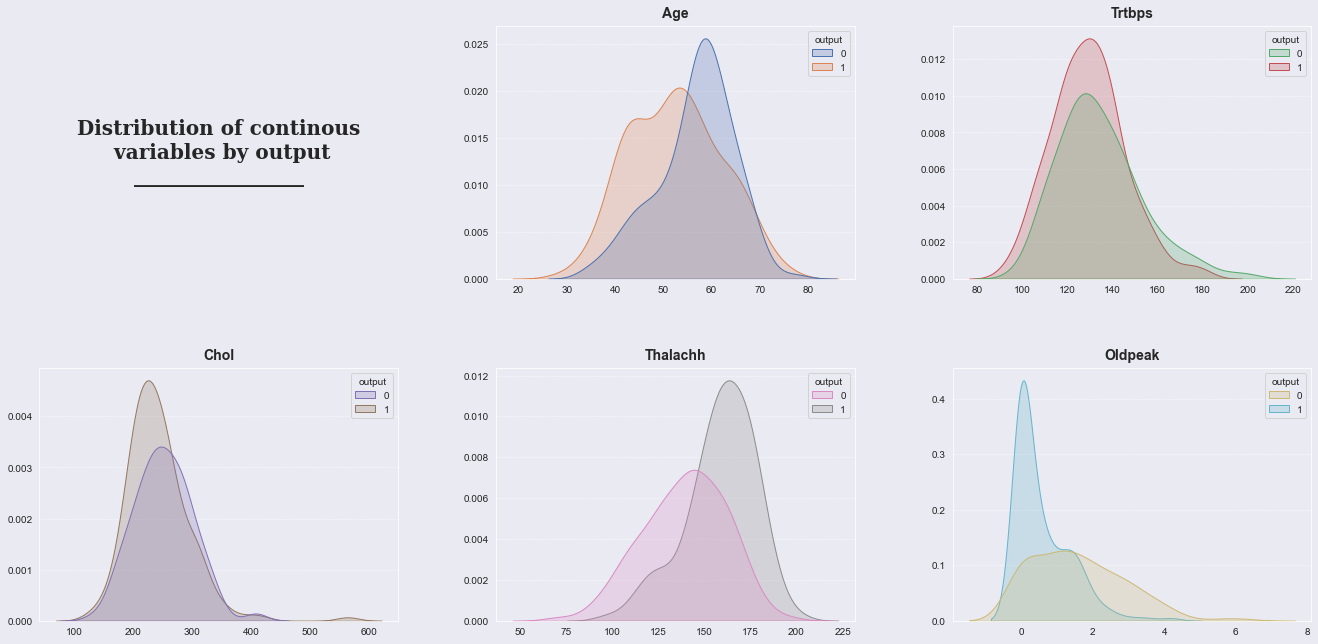

In [14]:
chart_count = len(continous) + 1

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(3, 3, i) for i in range(1, chart_count + 1)]
fig.tight_layout(pad=7)
fig.patch.set_facecolor('#eaeaf2')

axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Distribution of continous\n variables by output\n_________________',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, fontweight='bold', fontfamily='serif')

for i in range(1, chart_count):
    var = continous[i - 1]
    ax = axes[i]
    ax.grid(axis='y', linestyle=':')
    ax.text(0.5, 1.05, var.title(),
            horizontalalignment='center', verticalalignment='center',
            fontsize=14, fontweight='bold', transform=ax.transAxes)
    colorIndex = (2*(i - 1)) % 10
    color1 = sns.color_palette('deep')[colorIndex]
    color2 = sns.color_palette('deep')[colorIndex + 1]
    sns.kdeplot(data=df, x=var, hue='output', ax=ax, fill=True,
                palette=[color1, color2])
    ax.set_xlabel('')
    ax.set_ylabel('')

#### Conclusion

* `Trtbps` and `Chol` are not likely to have correlation
* `Age` and `Thalachh` might have weak correlation
* `Oldpeak` is likely to be correlated. 

### Kruskal-Wallis H-test <span id='kwht'/>

Since the distribution for some variables is non-Gaussian we would be using non-parametric test--specifically Kruskal-Wallis H Test 

In [15]:
for var in continous:
    gp = df[[var, 'output']].groupby(['output'])
    gp_array = [group[var].to_numpy() for name, group in gp]
    kstat, p = ss.kruskal(*gp_array)
    kstat, p = round(kstat, 6), round(p, 6)
    print(f'For variable {var}, Kruskal-Wallis H-test: {kstat} and p value: {p}')

For variable age, Kruskal-Wallis H-test: 17.164047 and p value: 3.4e-05
For variable trtbps, Kruskal-Wallis H-test: 4.465009 and p value: 0.034596
For variable chol, Kruskal-Wallis H-test: 4.413418 and p value: 0.035657
For variable thalachh, Kruskal-Wallis H-test: 55.417231 and p value: 0.0
For variable oldpeak, Kruskal-Wallis H-test: 53.650705 and p value: 0.0


#### Conclusion

Suprisingly, all variables have correlation. Although `chol` and `trtpbs` cut very close to our alpha (which is 0.05). 

### Check for Multi-Collinearity: Correlation of variables among themselves <span id='cfmc'/>

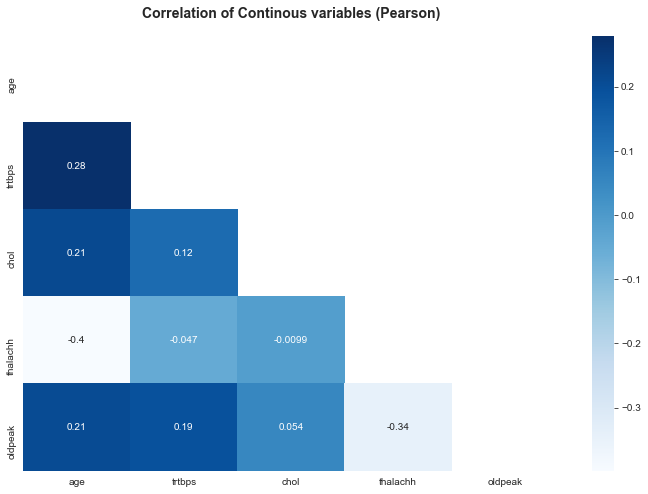

In [16]:
sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

corr_matrix = df[continous].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask, ax=ax)
fig.text(0.5, 1.05,
         'Correlation of Continous variables (Pearson)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', transform=ax.transAxes)
sns.set_style('dark')

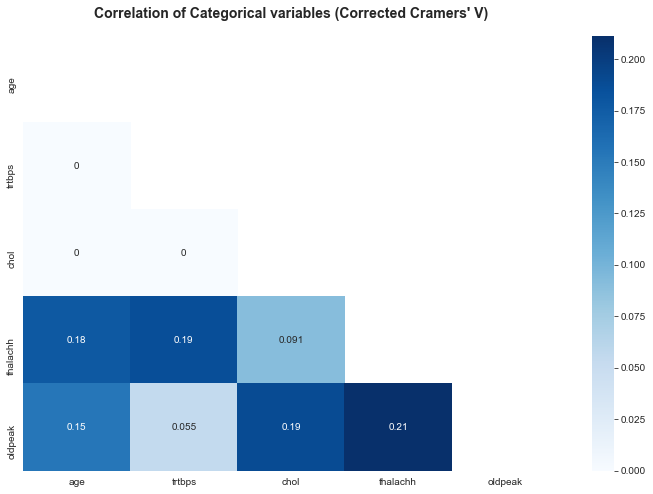

In [17]:
sns.set_style('white')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

corr_matrix = df[continous].corr(method=lambda x, y:
                                 cramers_corrected_stat(x, y)[0])

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask, ax=ax)
fig.text(0.5, 1.05,
         'Correlation of Categorical variables (Corrected Cramers\' V)',
         horizontalalignment='center', verticalalignment='center',
         fontsize=14, fontweight='bold', transform=ax.transAxes)
sns.set_style('dark')

#### Conclusion

Variables do *not have strong correlation* and are *weakly correlated*

### Pair plot - One plot to rule them all <span id='pp'/>

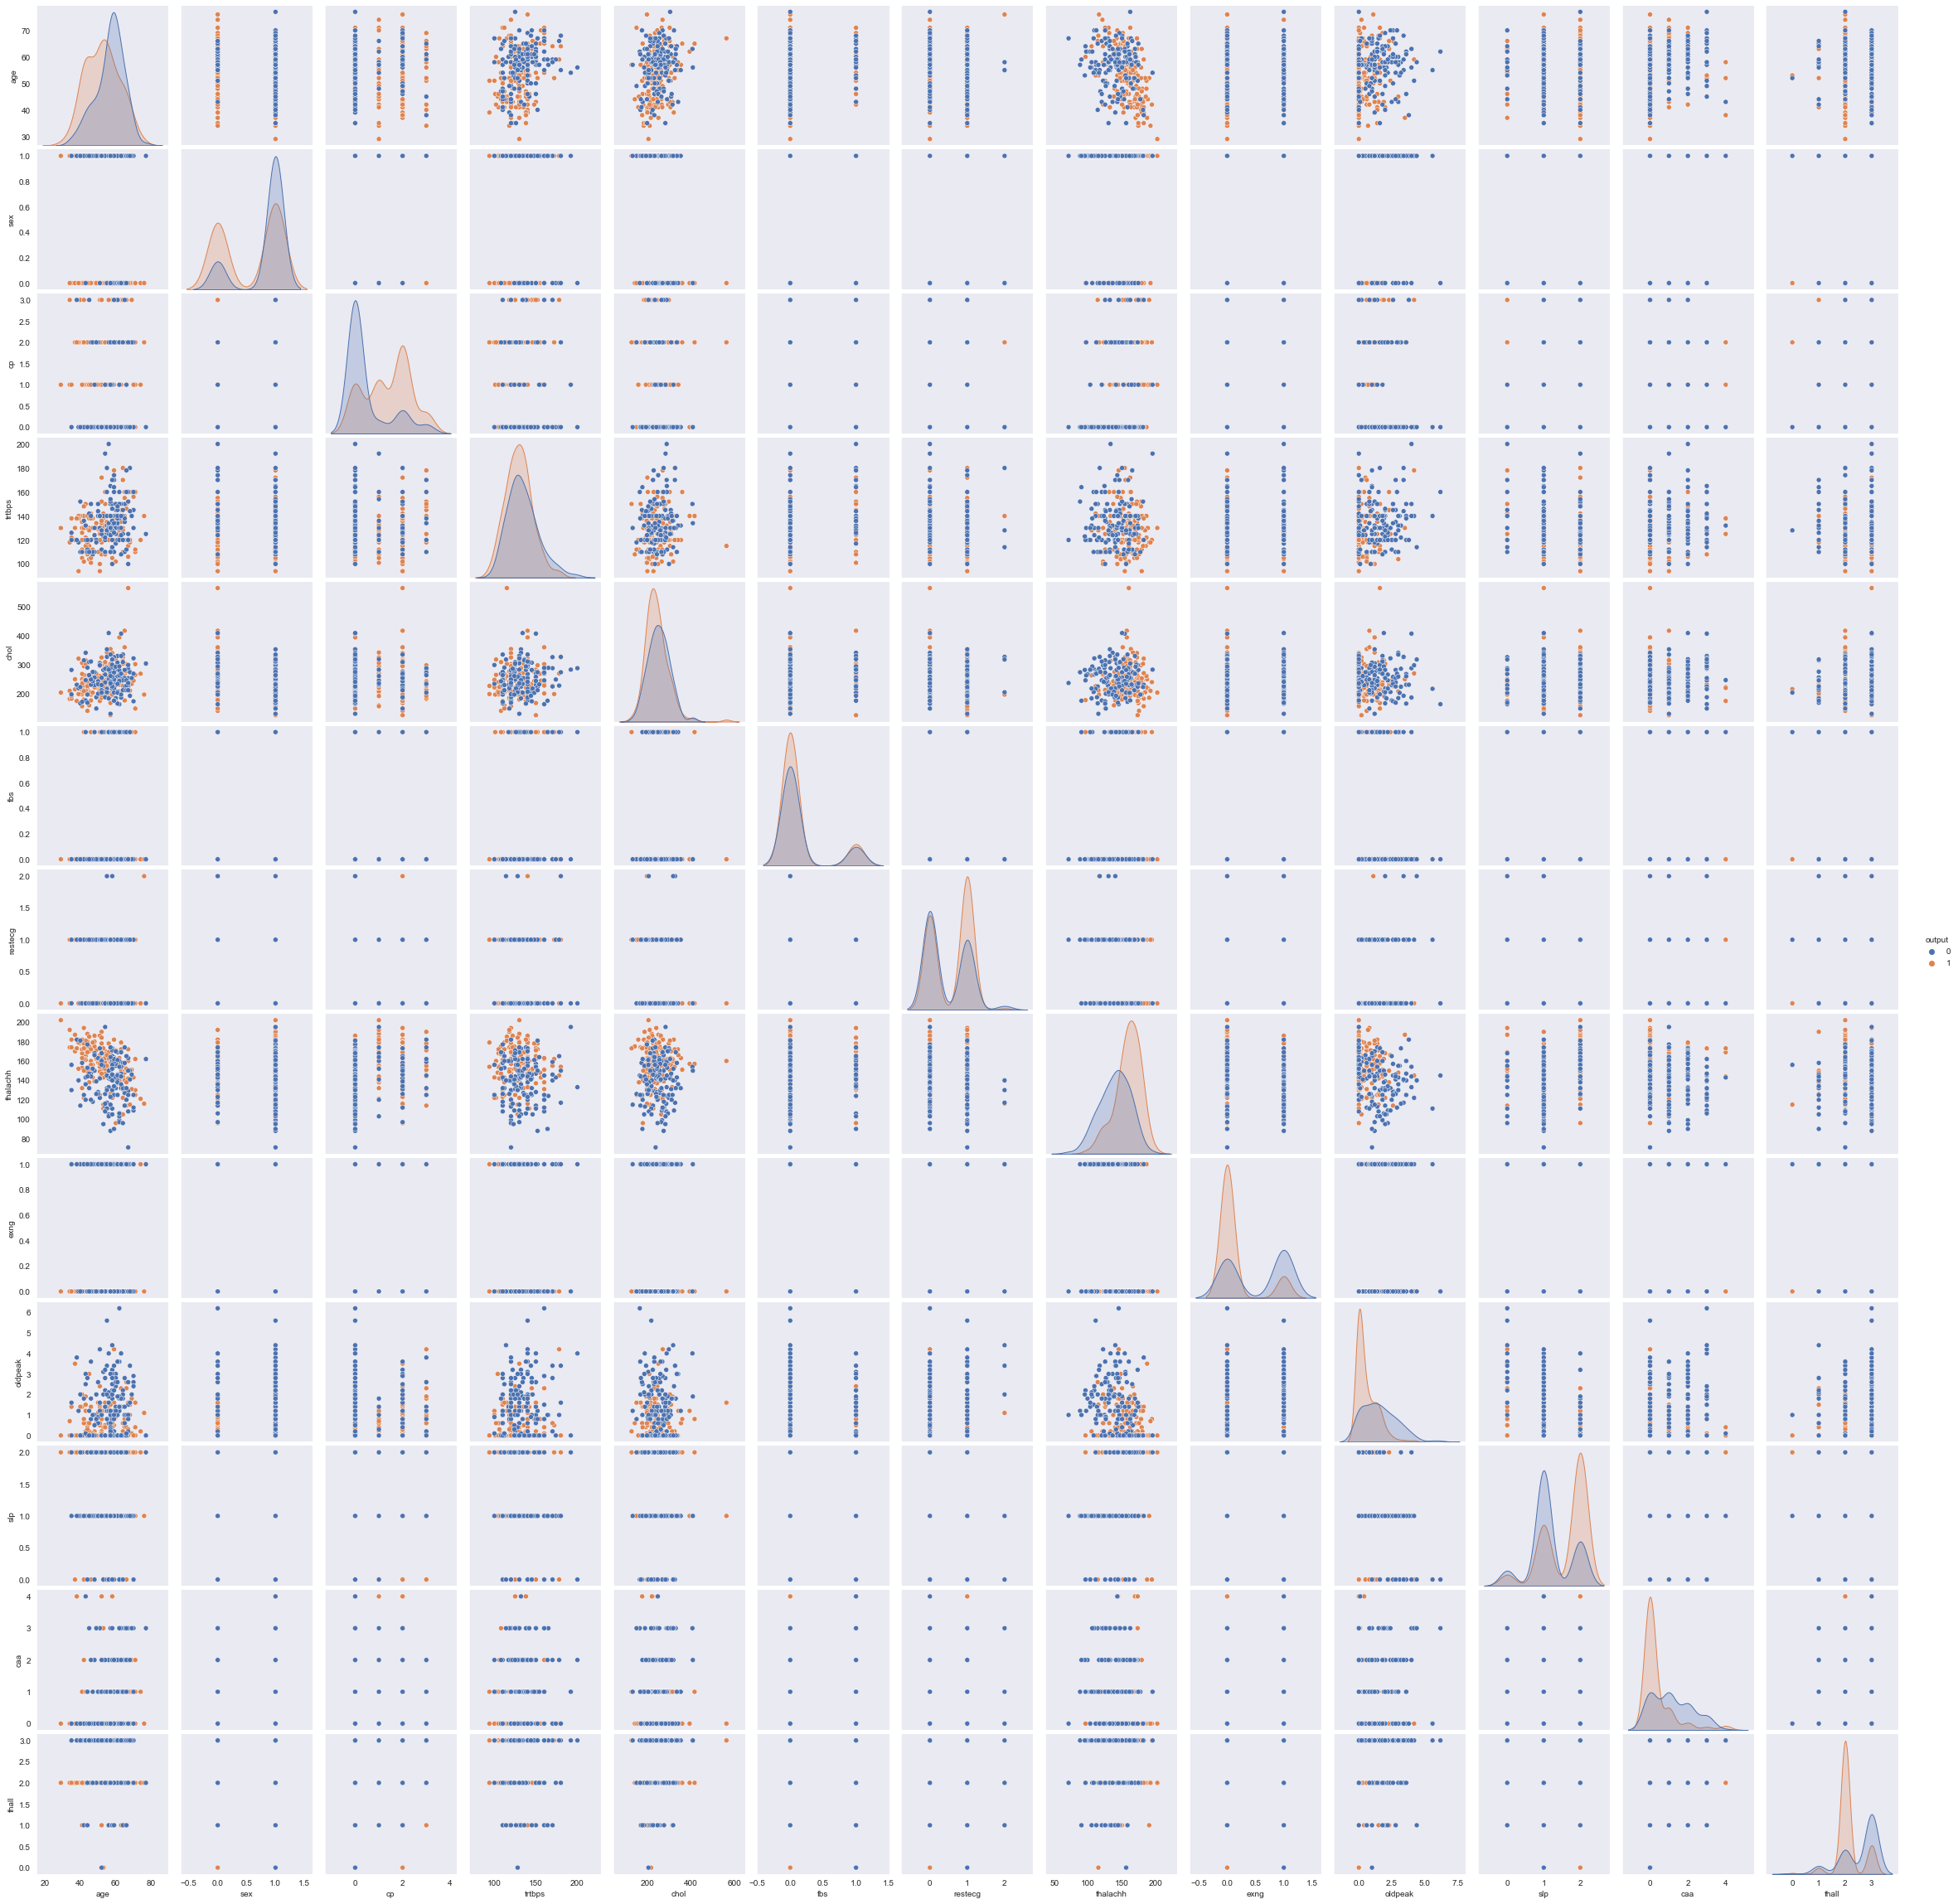

In [18]:
sns.pairplot(df, hue='output');

## Conclusion <span id='edac'/>

Here's the conclusion from the entire EDA:

**Feature Insights**

* `chol`, `trtbps`, and `oldpeak` have *decent amount of outliers.* This could affect certain models sensitive to them.

* `oldpeak` and `chol` (moderately) are *not uniformly distributed*. This could affect models or analysis with uniform distribution as requirement. 

* `Restecg`, `Thall`, `Caa`, `Slp` are *likely to impact few models sensitive to data distribution* because value counts for some values is extremely low. 

* `Fbs` and `Cp` could *possibly affect models sensitive to data distribution* because their value counts is also not ideal.


**Relation to target variable**

* All categorical variables *except* `Fbs` are related to output, albeit to varying degrees. Especially, `Restecg` and `sex` have very weak relation.

* All continous variables are related to output 

**Multi-collinearity**
* Variables do *not have strong correlation* and are *weakly correlated*

# Model Development <span id='md'/>

## Loading Libraries <span id='ll'/>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

print('Libraries are Loaded')

Libraries are Loaded


## Feature Engineering <span id='fe'/>

We would get out X as the values we determined to have an impact, Standardize them, and get One-hot encoding for categorical variables.

In [20]:
X = df[['sex', 'restecg', 'cp', 'exng', 'thall', 'caa', 'slp', 'age',
        'trtbps', 'chol', 'thalachh', 'oldpeak']]
y = df['output']

scaler = StandardScaler()
X[continous] = scaler.fit_transform(X[continous])

encode_columns = categorical.copy()
encode_columns.remove('fbs')

X = pd.get_dummies(X, columns=encode_columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=65)

print('Done Pre-processing')
print('Final No. of features: ', X.shape[1])

Done Pre-processing
Final No. of features:  28


## Training Models and Getting Results <span id='tmagr'/>

---------------------------------------------------
 SVM 
---------------------------------------------------
Accuracy: 0.91803
Precision: 0.90909
Recall: 0.9375
F1: 0.92308


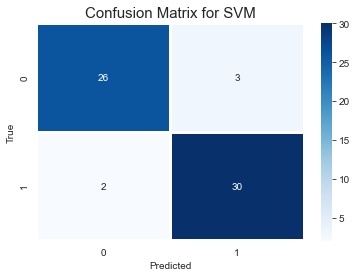

---------------------------------------------------
 Decision Tree 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.93333
Recall: 0.875
F1: 0.90323


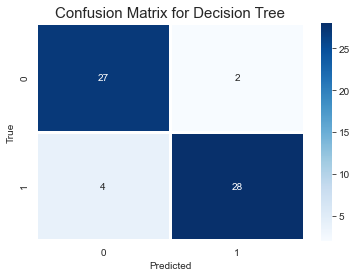

---------------------------------------------------
 Random Forest 
---------------------------------------------------
Accuracy: 0.93443
Precision: 0.9375
Recall: 0.9375
F1: 0.9375


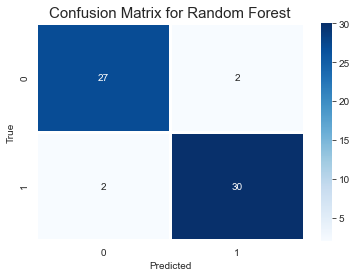

---------------------------------------------------
 Logistic Regression 
---------------------------------------------------
Accuracy: 0.96721
Precision: 1.0
Recall: 0.9375
F1: 0.96774


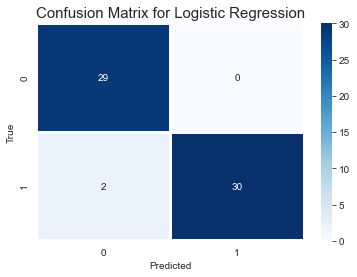

---------------------------------------------------
 K-Nearest Neighbors 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.90625
Recall: 0.90625
F1: 0.90625


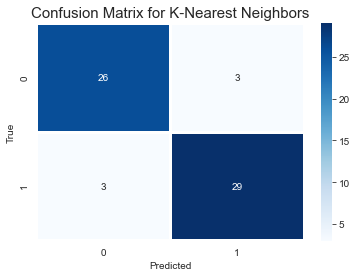

---------------------------------------------------
 Gradient Boosting 
---------------------------------------------------
Accuracy: 0.90164
Precision: 0.88235
Recall: 0.9375
F1: 0.90909


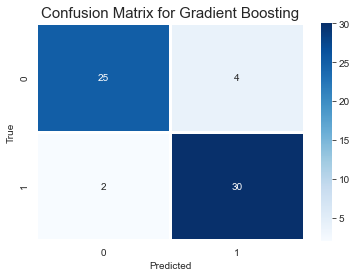

---------------------------------------------------
 AdaBoost Classifier 
---------------------------------------------------
Accuracy: 0.95082
Precision: 0.96774
Recall: 0.9375
F1: 0.95238


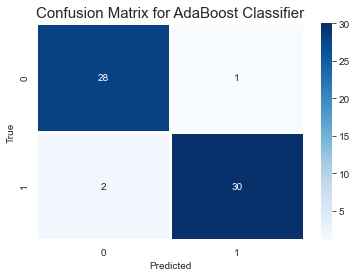

In [21]:
models = {
          'SVM': SVC(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'AdaBoost Classifier': AdaBoostClassifier(learning_rate=0.15, n_estimators=25),
         }

accuracy_dict, precision_dict, recall_dict, f1_dict = dict(), dict(), dict(), dict()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    print('---------------------------------------------------\n',
          name,
          '\n---------------------------------------------------')

    acc = accuracy_score(y_test, y_hat)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_hat, average='binary')
    acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)
    
    accuracy_dict[name] = acc
    precision_dict[name] = precision
    recall_dict[name] = recall
    f1_dict[name] = f1

    print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

    cm = confusion_matrix(y_test, y_hat)
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
    plt.title(f'Confusion Matrix for {name}', fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

## Stacking <span id='secm'/>

---------------------------------------------------
 Stacked Classifier 
---------------------------------------------------
Accuracy: 0.91803
Precision: 0.96552
Recall: 0.875
F1: 0.91803


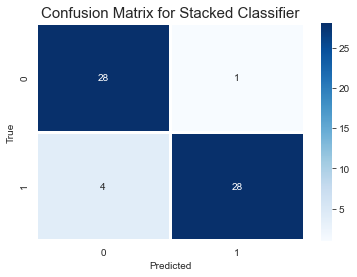

In [22]:
level0 = [(name, model) for name, model in models.items()]
level1 = LogisticRegression()
stacked = StackingClassifier(estimators=level0, final_estimator=level1, n_jobs=-1)
stacked.fit(X_train, y_train)
y_hat = stacked.predict(X_test)

name = 'Stacked Classifier'
print('---------------------------------------------------\n',
      name,
      '\n---------------------------------------------------')

acc = accuracy_score(y_test, y_hat)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_hat, average='binary')
acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)

accuracy_dict[name] = acc
precision_dict[name] = precision
recall_dict[name] = recall
f1_dict[name] = f1

print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

cm = confusion_matrix(y_test, y_hat)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='Blues', linewidths=2)
plt.title(f'Confusion Matrix for {name}', fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Plot of Scores <span id='pos'/>

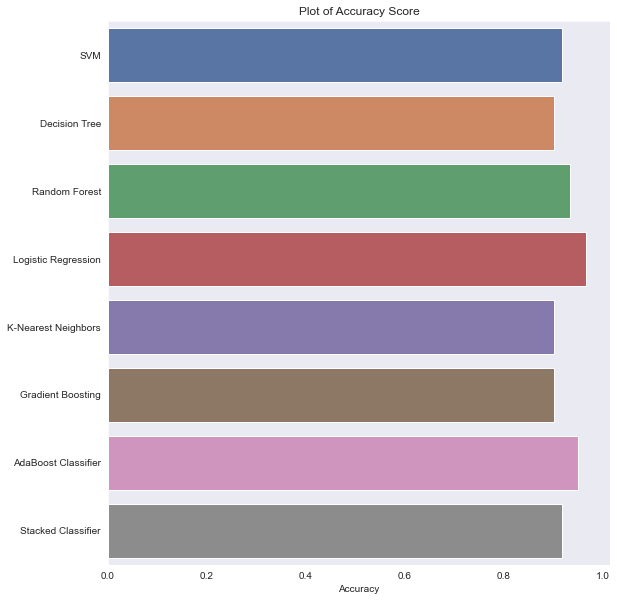

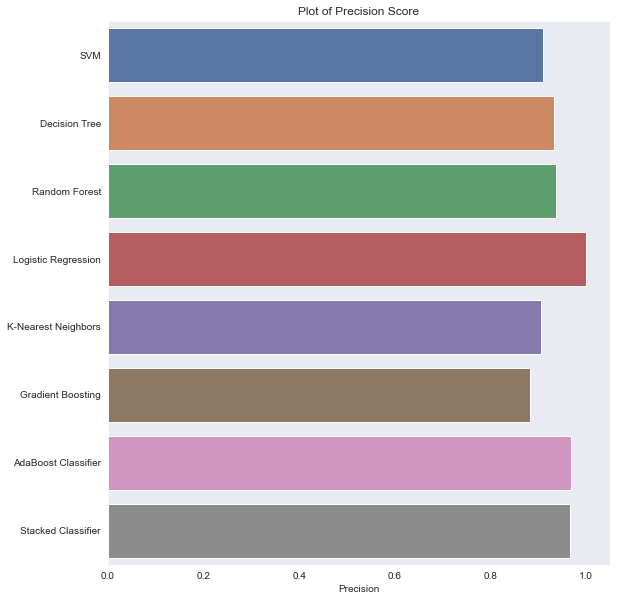

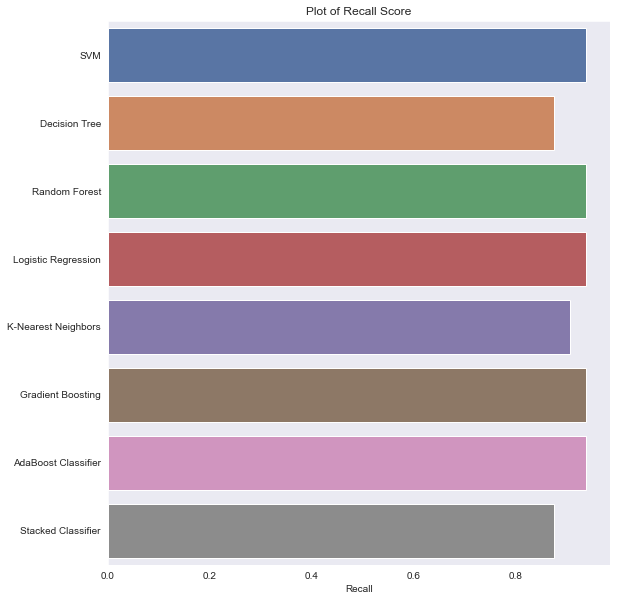

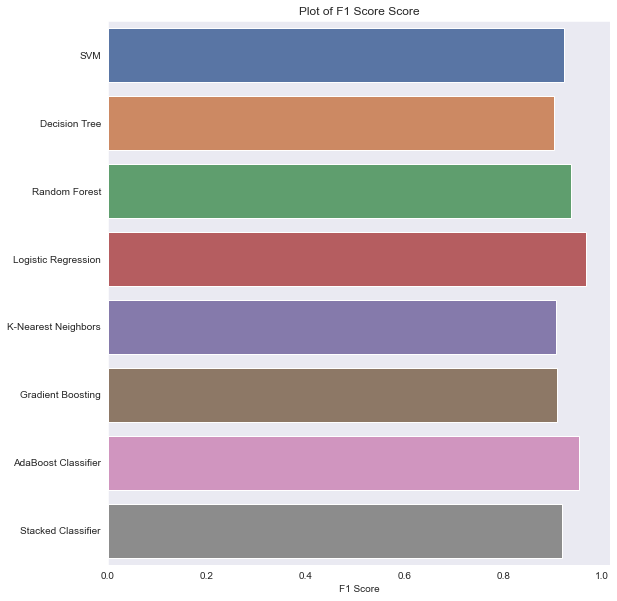

In [23]:
scores_dicts = {
                'Accuracy': accuracy_dict,
                'Precision': precision_dict,
                'Recall': recall_dict,
                'F1 Score': f1_dict,
              }

for name, scores_dict in scores_dicts.items():
    index, values = zip(*scores_dict.items())
    acc_df = pd.DataFrame(data=values, index=index, columns=[name])
    plt.figure(figsize=(9, 10))
    sns.barplot(y=acc_df.index, x=acc_df[name])
    plt.title(f'Plot of {name} Score')

# Conclusion <span id='fcc'/>

* We started with tabular data and performed EDA and got crucial information
* We did some feature engineering by performing Standardization and One-Hot Encoding
* We created several models and got their results. The best ones were Ensemble Methods (Gradient Boost, AdaBoost) and Logistic Regression

# Thank you! <span id='ty' />

Thanks for reading up to this far. 

If you liked the notebook, please consider upvoting. 

Also, thanks to my bro [Naman Manchanda](https://www.kaggle.com/namanmanchanda) for his tips on visualizations. 